# Training

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix)
from sklearn.preprocessing import StandardScaler 

import statsmodels.api as sm 
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

import re

In [2]:
df = pd.read_parquet("/PHI_conf/VaccineUptake/Analysts/Vay/vaccinate_uptake_ML_analysis/vaccine_data/master_data/cohort_df_merged_UR8_encoded.parquet")

In [3]:

unique_cohorts = df['cohort_group_ML_analysis'].unique()
print("Unique values in 'cohort_group_ML_analysis':")
for value in unique_cohorts:
    print("-", value)

Unique values in 'cohort_group_ML_analysis':
- AGE_50_TO_64
- AGE_65_TO_74
- AGE_75_AND_OVER
- ALL_HEALTH_CARE_WORKERS
- ALL_SOCIAL_CARE_WORKERS
- 18_TO_64_FLU_AT_RISK
- OLDER_PEOPLE_CARE_HOME
- WEAKENED_IMMUNE_SYSTEM




======== Cohort: AGE_50_TO_64 =========
Train size: 2068840
Test size: 886646

Model Performance Metrics:
   Metric    Value
 Accuracy 0.591561
Precision 0.583148
   Recall 0.531293
 F1 Score 0.556014
AUC Score 0.626797


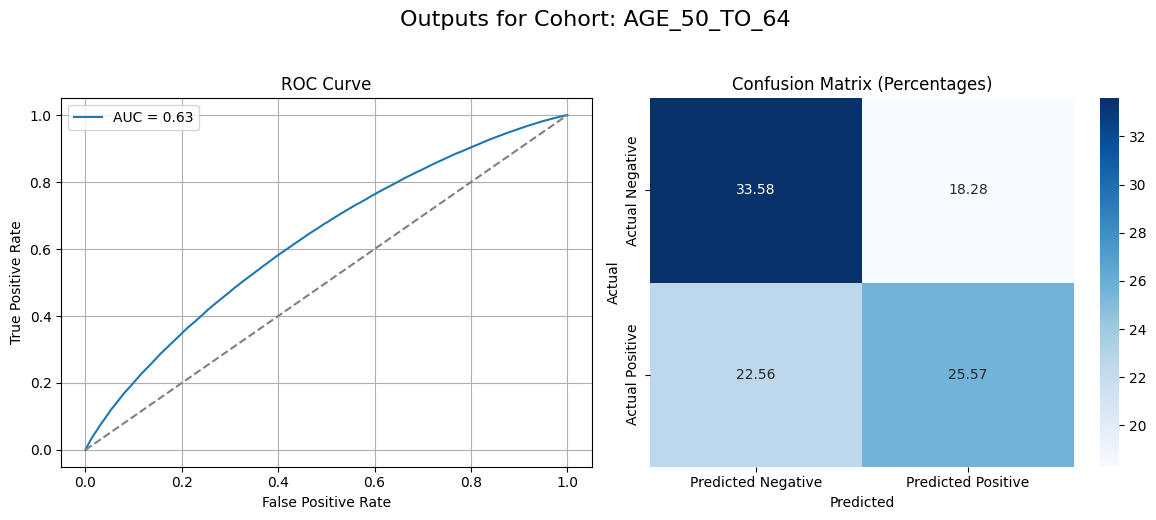

Optimization terminated successfully.
         Current function value: 0.667646
         Iterations 4
Standard deviation of patient_age: 4.24 years
                                                                       Interpretation  Odds Ratio  CI Lower  CI Upper  Significant
patient_sex    Being female increased odds of uptake by 32.4% compared to being male.       1.324     1.317     1.332         True
patient_age      Increased odds by 40.2% per 4.2 year(s)/1 Standard Deviation in age.       1.402     1.398     1.406         True
SIMD_quintile         Increased odds of uptake by 19.7% for every 1 increase of SIMD.       1.197     1.195     1.200         True
UR8_2022_2              Increased odds of uptake by 20.9% compared to UR8 Category 1.       1.209     1.201     1.217         True
UR8_2022_3              Increased odds of uptake by 21.0% compared to UR8 Category 1.       1.210     1.198     1.222         True
UR8_2022_4               Increased odds of uptake by 9.0% compared

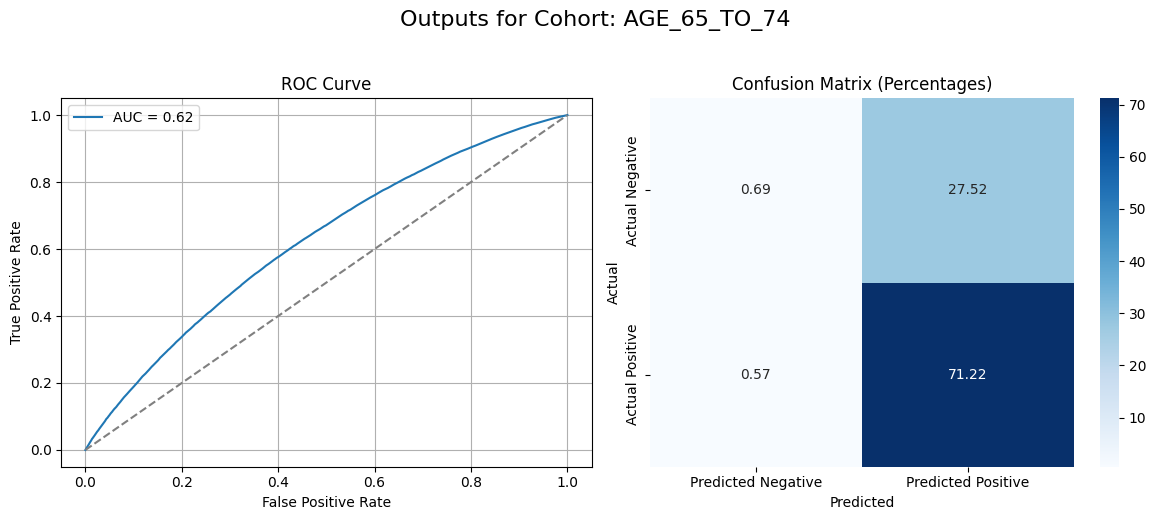

Optimization terminated successfully.
         Current function value: 0.576210
         Iterations 5
Standard deviation of patient_age: 2.87 years
                                                                      Interpretation  Odds Ratio  CI Lower  CI Upper  Significant
patient_sex    Being female increased odds of uptake by 3.8% compared to being male.       1.038     1.028     1.048         True
patient_age     Increased odds by 29.0% per 2.9 year(s)/1 Standard Deviation in age.       1.290     1.284     1.297         True
SIMD_quintile        Increased odds of uptake by 25.8% for every 1 increase of SIMD.       1.258     1.254     1.263         True
UR8_2022_2             Increased odds of uptake by 32.8% compared to UR8 Category 1.       1.328     1.313     1.344         True
UR8_2022_3             Increased odds of uptake by 33.6% compared to UR8 Category 1.       1.336     1.314     1.359         True
UR8_2022_4             Increased odds of uptake by 15.5% compared to UR8

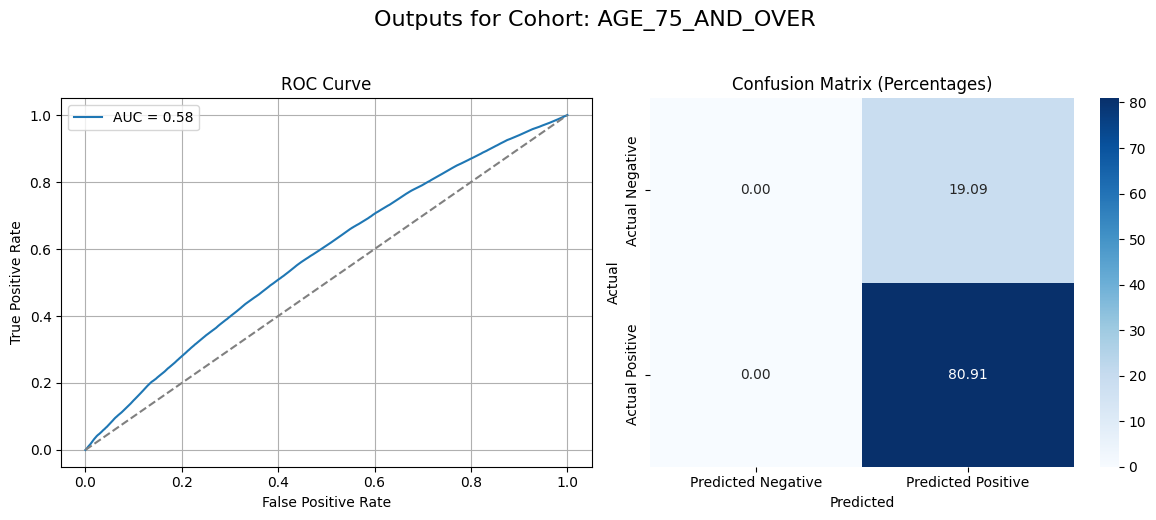

Optimization terminated successfully.
         Current function value: 0.481940
         Iterations 6
Standard deviation of patient_age: 5.44 years
                                                                      Interpretation  Odds Ratio  CI Lower  CI Upper  Significant
patient_sex    Being female decreased odds of uptake by 8.7% compared to being male.       0.913     0.903     0.924         True
patient_age      Decreased odds by 1.8% per 5.4 year(s)/1 Standard Deviation in age.       0.982     0.977     0.988         True
SIMD_quintile        Increased odds of uptake by 19.9% for every 1 increase of SIMD.       1.199     1.194     1.204         True
UR8_2022_2             Increased odds of uptake by 22.4% compared to UR8 Category 1.       1.224     1.207     1.241         True
UR8_2022_3             Increased odds of uptake by 21.3% compared to UR8 Category 1.       1.213     1.189     1.237         True
UR8_2022_4             Increased odds of uptake by 20.3% compared to UR8

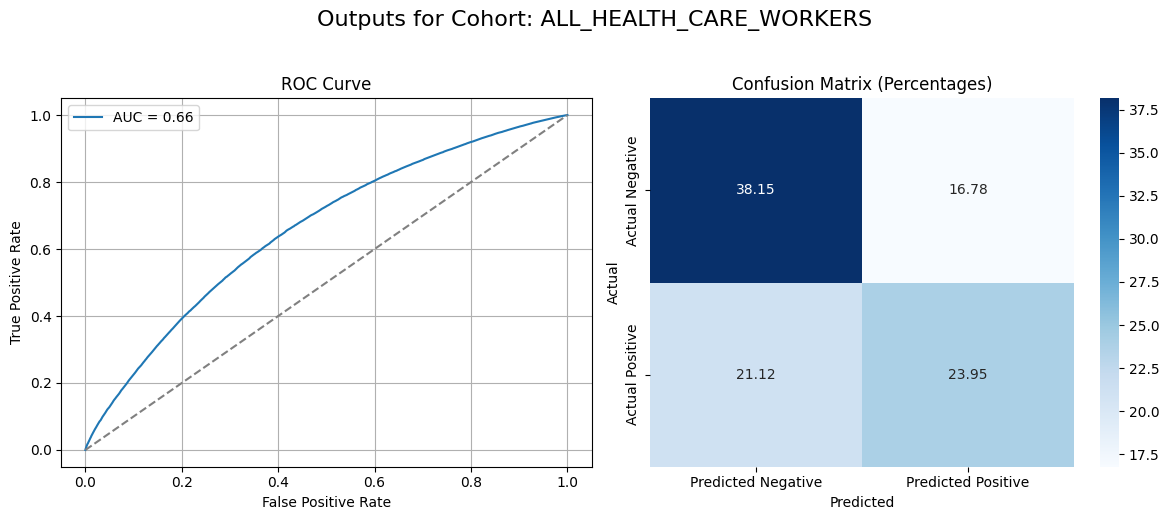

Optimization terminated successfully.
         Current function value: 0.650504
         Iterations 5
Standard deviation of patient_age: 12.12 years
                                                                      Interpretation  Odds Ratio  CI Lower  CI Upper  Significant
patient_sex    Being female increased odds of uptake by 2.5% compared to being male.       1.025     1.007     1.044         True
patient_age    Increased odds by 70.6% per 12.1 year(s)/1 Standard Deviation in age.       1.706     1.693     1.719         True
SIMD_quintile        Increased odds of uptake by 17.5% for every 1 increase of SIMD.       1.175     1.169     1.181         True
UR8_2022_2              Increased odds of uptake by 4.0% compared to UR8 Category 1.       1.040     1.022     1.058         True
UR8_2022_3              Increased odds of uptake by 5.7% compared to UR8 Category 1.       1.057     1.029     1.085         True
UR8_2022_4                                                     No signi

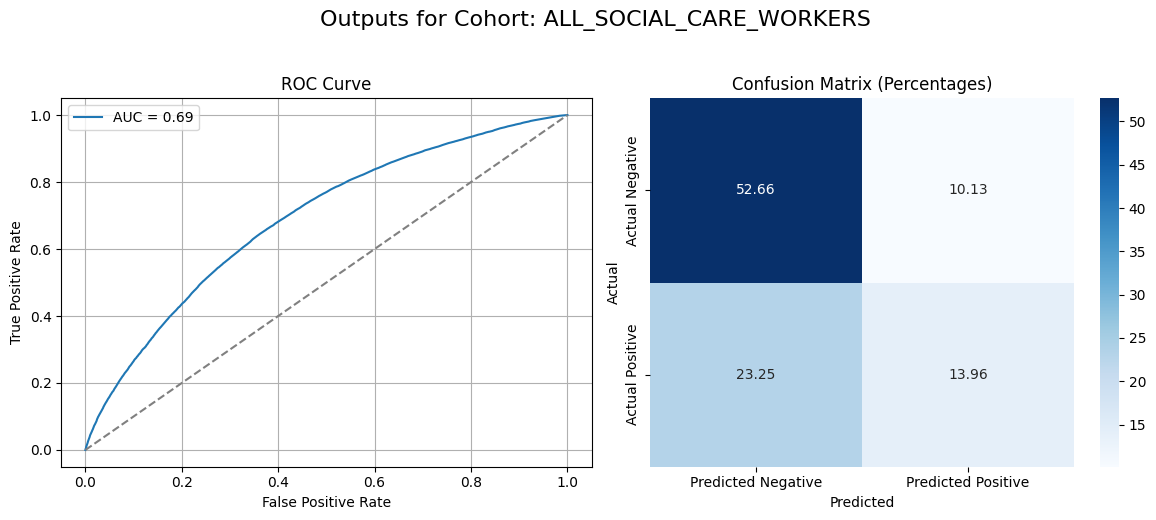

Optimization terminated successfully.
         Current function value: 0.608967
         Iterations 5
Standard deviation of patient_age: 13.71 years
                                                                      Interpretation  Odds Ratio  CI Lower  CI Upper  Significant
patient_sex                                                    No significant effect       1.001     0.974     1.028        False
patient_age    Increased odds by 97.4% per 13.7 year(s)/1 Standard Deviation in age.       1.974     1.954     1.995         True
SIMD_quintile        Increased odds of uptake by 11.3% for every 1 increase of SIMD.       1.113     1.105     1.121         True
UR8_2022_2             Increased odds of uptake by 20.1% compared to UR8 Category 1.       1.201     1.174     1.228         True
UR8_2022_3             Increased odds of uptake by 26.0% compared to UR8 Category 1.       1.260     1.219     1.303         True
UR8_2022_4             Increased odds of uptake by 15.0% compared to UR

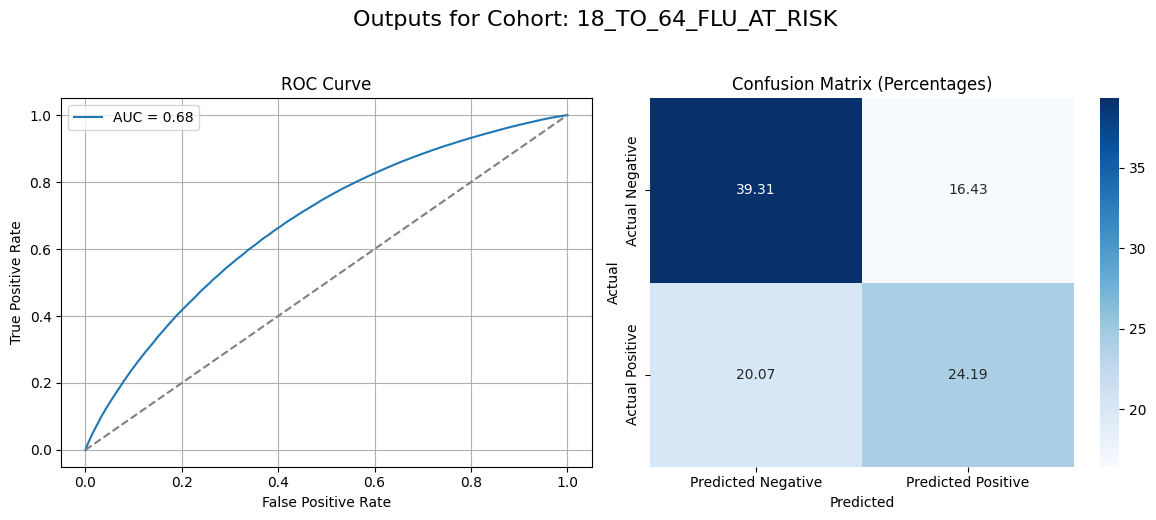

Optimization terminated successfully.
         Current function value: 0.638023
         Iterations 5
Standard deviation of patient_age: 12.58 years
                                                                       Interpretation  Odds Ratio  CI Lower  CI Upper  Significant
patient_sex    Being female increased odds of uptake by 31.5% compared to being male.       1.315     1.307     1.323         True
patient_age     Increased odds by 80.1% per 12.6 year(s)/1 Standard Deviation in age.       1.801     1.795     1.807         True
SIMD_quintile         Increased odds of uptake by 21.0% for every 1 increase of SIMD.       1.210     1.207     1.212         True
UR8_2022_2              Increased odds of uptake by 20.5% compared to UR8 Category 1.       1.205     1.197     1.214         True
UR8_2022_3              Increased odds of uptake by 20.8% compared to UR8 Category 1.       1.208     1.195     1.221         True
UR8_2022_4               Increased odds of uptake by 8.6% compare

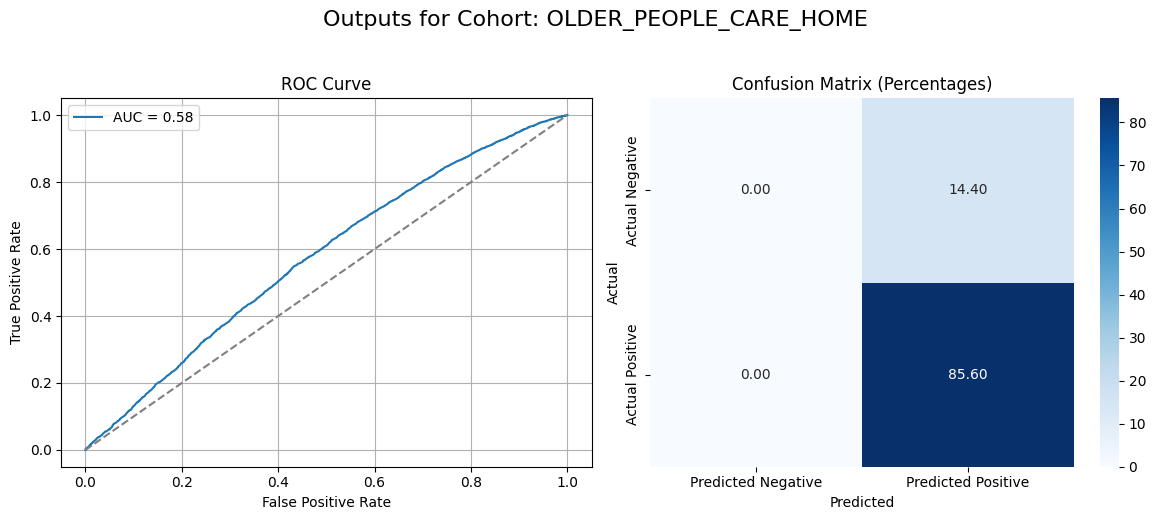

Optimization terminated successfully.
         Current function value: 0.406716
         Iterations 6
Standard deviation of patient_age: 9.55 years
                                                                     Interpretation  Odds Ratio  CI Lower  CI Upper  Significant
patient_sex                                                   No significant effect       1.009     0.960     1.061        False
patient_age    Increased odds by 29.4% per 9.5 year(s)/1 Standard Deviation in age.       1.294     1.265     1.323         True
SIMD_quintile        Increased odds of uptake by 5.5% for every 1 increase of SIMD.       1.055     1.037     1.073         True
UR8_2022_2             Increased odds of uptake by 8.0% compared to UR8 Category 1.       1.080     1.024     1.140         True
UR8_2022_3                                                    No significant effect       0.988     0.911     1.071        False
UR8_2022_4                                                    No significant e

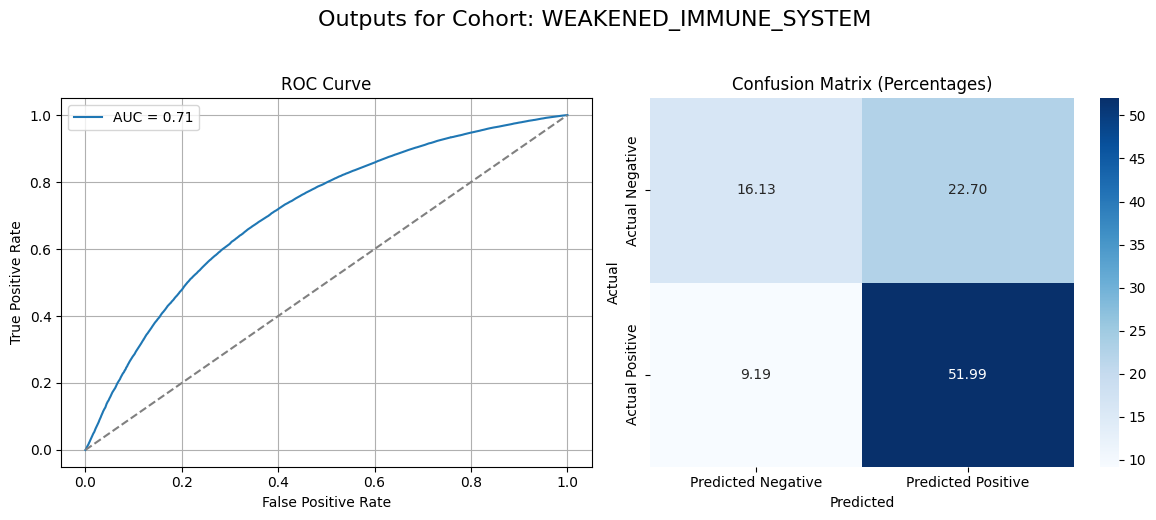

Optimization terminated successfully.
         Current function value: 0.603159
         Iterations 5
Standard deviation of patient_age: 15.66 years
                                                                       Interpretation  Odds Ratio  CI Lower  CI Upper  Significant
patient_sex    Being female increased odds of uptake by 13.6% compared to being male.       1.136     1.116     1.157         True
patient_age    Increased odds by 105.1% per 15.7 year(s)/1 Standard Deviation in age.       2.051     2.031     2.070         True
SIMD_quintile         Increased odds of uptake by 21.3% for every 1 increase of SIMD.       1.213     1.205     1.221         True
UR8_2022_2              Increased odds of uptake by 19.4% compared to UR8 Category 1.       1.194     1.169     1.220         True
UR8_2022_3              Increased odds of uptake by 21.1% compared to UR8 Category 1.       1.211     1.173     1.251         True
UR8_2022_4                                                      N

In [4]:
cross_cohort_summary = {}
model_scores = {}
 
for cohort in unique_cohorts:    
    print(f"\n\n======== Cohort: {cohort} =========")
    cohort_df = df[df["cohort_group_ML_analysis"] == cohort].copy()
    # Prepare features and target
    X = cohort_df.drop(columns=["cohort_group_ML_analysis", "attended_vaccination_event", "UR8_2022_1"])
    y = cohort_df["attended_vaccination_event"]
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    print("Train size:", len(X_train))
    print("Test size:", len(X_test))
 
    #Scaling patient age - standardising patient_age to z score
    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    X_train_scaled['patient_age'] = scaler.fit_transform(X_train[['patient_age']])
    X_test_scaled['patient_age'] = scaler.transform(X_test[['patient_age']])
 
    #Fit model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)
 
    # Predict probabilities
    y_prob = model.predict_proba(X_test_scaled)[:, 1] # Probability of the positive class
 
    # Predict class labels
    y_pred = model.predict(X_test_scaled)
 
    #ROC Curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # Use y_test, not y
    auc_score = roc_auc_score(y_test, y_prob)  # Use y_test, not y
 
 
    metrics_summary = pd.DataFrame({
        "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "AUC Score"],
        "Value": [accuracy_score(y_test, y_pred),
                precision_score(y_test, y_pred),
                recall_score(y_test, y_pred),
                f1_score(y_test, y_pred),
                auc_score]
    })
 
    model_scores[cohort] = {
        "F1 Score": f1_score(y_test, y_pred),
        "AUC Score": auc_score
    }
    print("\nModel Performance Metrics:")
    print(metrics_summary.to_string(index=False))
 
    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
 
    # ROC Curve
    axes[0].plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    axes[0].plot([0, 1], [0, 1], linestyle="--", color="gray")
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[0].set_title("ROC Curve")
    axes[0].legend()
    axes[0].grid(True)
 
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_percent = cm.astype('float') / cm.sum() * 100
 
    sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues',
        xticklabels=['Predicted Negative', 'Predicted Positive'],
        yticklabels=['Actual Negative', 'Actual Positive'],
        ax=axes[1])
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')
    axes[1].set_title('Confusion Matrix (Percentages)')
 
    fig.suptitle(f"Outputs for Cohort: {cohort}", fontsize =16, y = 1.03)
    # Adjust layout and save the figure
    plt.tight_layout()
    #output_path = "output/roc_confusion_matrix.png"
    #plt.savefig(output_path)
    plt.show()
 
   
    #Statsmodels analysis (using training data for consistency)
    X_train_sm = sm.add_constant(X_train_scaled)
    logit_model = sm.Logit(y_train, X_train_sm)
    result = logit_model.fit()
 
    #Odds Ratios
    odds_ratios = np.exp(result.params)
 
    #95% Confidence Intervals for ORs
    conf = result.conf_int()
    conf.columns = ['2.5%', '97.5%']
    conf = np.exp(conf)  # Convert to OR scale
 
 
    summary_table = pd.concat([odds_ratios, conf], axis=1)
    summary_table.columns = ['Odds Ratio', 'CI Lower', 'CI Upper']
   
    # Add significance column based on CI including 1
    summary_table['Significant'] = ~((summary_table['CI Lower'] <= 1) & (summary_table['CI Upper'] >= 1))
 
    age_std = cohort_df['patient_age'].std()
    print(f"Standard deviation of patient_age: {age_std:.2f} years")
   
    def custom_interpret(row):
        odds = row['Odds Ratio']
        ci_low = row['CI Lower']
        ci_high = row['CI Upper']
        name = row.name  # the index (variable name)
   
        # Significance check
        significant = not (ci_low <= 1 <= ci_high)
        if not significant:
            return 'No significant effect'
   
        change = (odds - 1) * 100
 
 
        if change > 0:
            direction = "increased"
        else:
            direction = "decreased"
 
        if name == "patient_age":
            return f"{direction.capitalize()} odds by {abs(change):.1f}% per {age_std:.1f} year(s)/1 Standard Deviation in age."
        elif name == "patient_sex":
            return f"Being female {direction} odds of uptake by {abs(change):.1f}% compared to being male."
        elif name == "SIMD_quintile":
            return f"{direction.capitalize()} odds of uptake by {abs(change):.1f}% for every 1 increase of SIMD."
        elif name == "UR8_2022_2":
            return f"{direction.capitalize()} odds of uptake by {abs(change):.1f}% compared to UR8 Category 1."
        elif name == "UR8_2022_3":
            return f"{direction.capitalize()} odds of uptake by {abs(change):.1f}% compared to UR8 Category 1."
        elif name == "UR8_2022_4":
            return f"{direction.capitalize()} odds of uptake by {abs(change):.1f}% compared to UR8 Category 1."
        elif name == "UR8_2022_5":
            return f"{direction.capitalize()} odds of uptake by {abs(change):.1f}% compared to UR8 Category 1."
        elif name == "UR8_2022_6":
            return f"{direction.capitalize()} odds of uptake by {abs(change):.1f}% compared to UR8 Category 1."
        elif name == "UR8_2022_7":
            return f"{direction.capitalize()} odds of uptake by {abs(change):.1f}% compared to UR8 Category 1."
        elif name == "UR8_2022_8":
            return f"{direction.capitalize()} odds of uptake by {abs(change):.1f}% compared to UR8 Category 1."                            
        else:
            return f"{direction.capitalize()} odds by {abs(change):.1f}%"
   
   
    #Applying the custom_interpret function
    summary_table['Interpretation'] = summary_table.apply(custom_interpret, axis=1)
    summary_table = summary_table.drop(index="const", errors = "ignore")
 
    # Reorder columns and round values for readability
    summary_display = summary_table[['Interpretation', 'Odds Ratio', 'CI Lower', 'CI Upper', 'Significant']].round(3)
    print(summary_display.to_string())
   
    cohort_summary = {}
 
    for var, row in summary_table.iterrows():
        if row['Significant']:
            change = (row['Odds Ratio'] - 1) * 100
            cohort_summary[var] = f"{change:+.1f}%"
        else:
            cohort_summary[var] = "-%"
   
 
    cross_cohort_summary[cohort] = cohort_summary
 
 


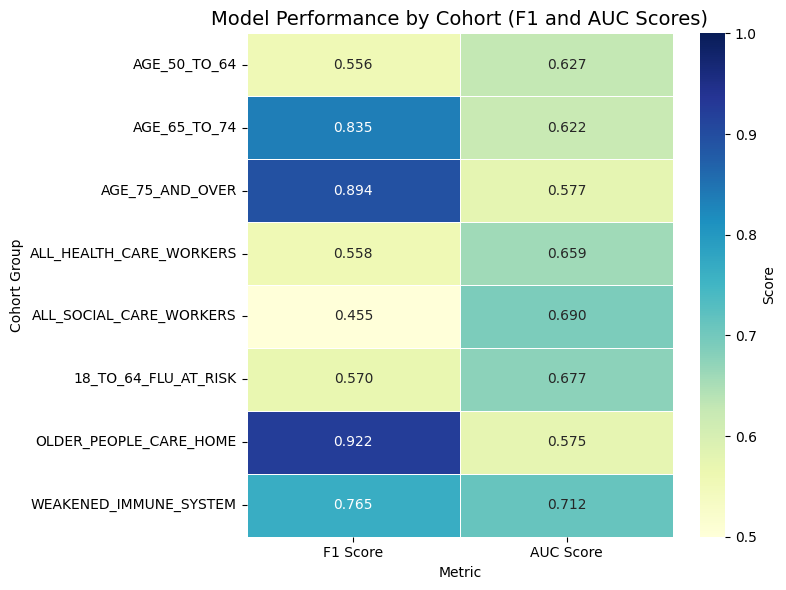

/tmp/ipykernel_868/1454211414.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  heatmap_values = cross_cohort_df.applymap(extract_percent)


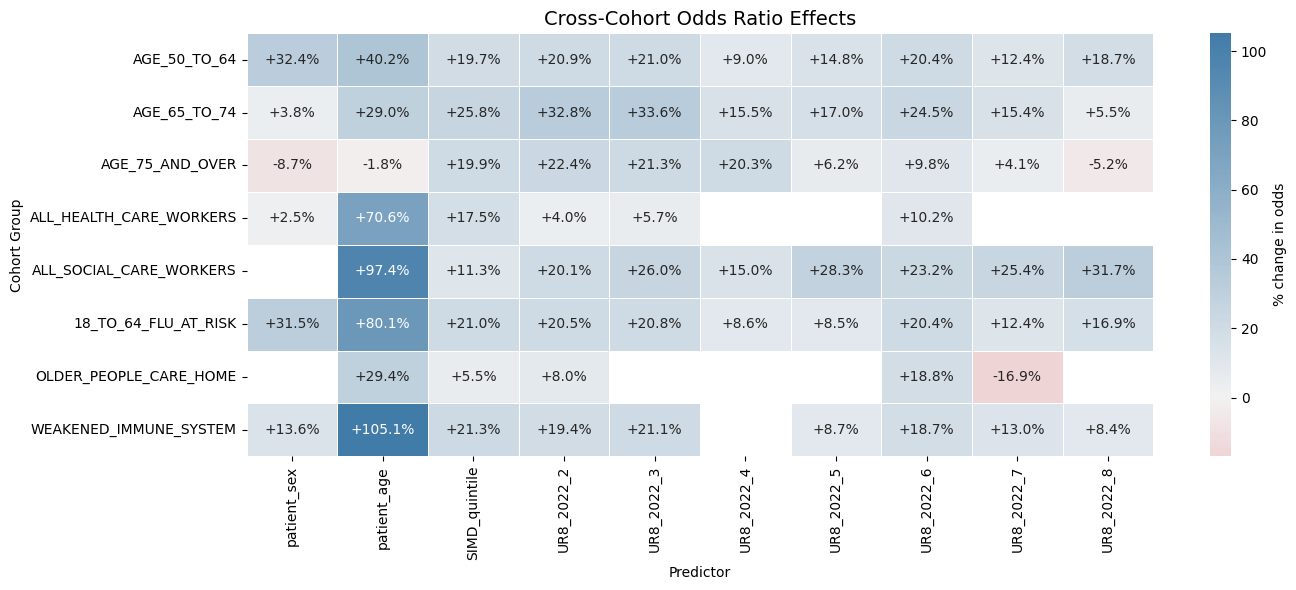

In [5]:
# Create a DataFrame of scores
scores_df = pd.DataFrame(model_scores).T  # Cohorts as rows
scores_df = scores_df.round(3)
 
# Plot heatmap
plt.figure(figsize=(8, len(scores_df) * 0.5 + 2))  # Dynamically scale with number of cohorts
sns.heatmap(scores_df, annot=True, fmt=".3f", cmap="YlGnBu", linewidths=0.5, cbar_kws={'label': 'Score'}, vmin = 0.5, vmax = 1.0)

plt.title("Model Performance by Cohort (F1 and AUC Scores)", fontsize=14)
plt.xlabel("Metric")
plt.ylabel("Cohort Group")
plt.tight_layout()
plt.show()

cross_cohort_df = pd.DataFrame(cross_cohort_summary).T  # Transpose so cohorts are rows
cross_cohort_df = cross_cohort_df.fillna("—")  # Replace missing values with "—"
 
# Extract numeric values for significant entries (e.g., +4.2%)
def extract_percent(value):
    if isinstance(value, str) and '%' in value and value != "-%":
        match = re.search(r'([+-]?[0-9.]+)', value)
        return float(match.group(1)) if match else np.nan
    else:
        return np.nan  # For "-%" and "—"
 
# Prepare data for heatmap coloring (numeric values for coloring)
heatmap_values = cross_cohort_df.applymap(extract_percent)
 
# Prepare data for annotations (keep original strings)
annot_data = cross_cohort_df.replace("—", "-%")  # unify missing display
 
# Plot
plt.figure(figsize=(14, 6))
ax = sns.heatmap(
    heatmap_values,
    annot=annot_data,
    fmt="",
    cmap=sns.diverging_palette(10, 240, as_cmap=True),  # blue to red
    center=0,
    linewidths=0.5,
    cbar_kws={'label': '% change in odds'},
    mask=annot_data == "-%"  # mask non-significant cells from coloring
)
 
# Set plot labels
plt.title("Cross-Cohort Odds Ratio Effects", fontsize=14)
plt.xlabel("Predictor")
plt.ylabel("Cohort Group")
plt.tight_layout()
plt.show()
